In [1]:
import os
import pickle
from matplotlib import pyplot as plt
import numpy as np

results_path = os.path.join('.', 'results')
naive_results = []
ltrwe_results = []
sss_results = []
for idx in range(5):
    with open(os.path.join(results_path, 'noisy_dataset_trial', 'results_MNIST_ltrwe_{}.pickle'.format(idx)), 'rb') as F:
        ltrwe_results.append(pickle.load(F))
    with open(os.path.join(results_path, 'noisy_dataset_trial', 'results_MNIST_naive_{}.pickle'.format(idx)), 'rb') as F:
        naive_results.append(pickle.load(F))
    with open(os.path.join(results_path, 'noisy_dataset_trial', 'results_MNIST_semi-self-supervised_{}.pickle'.format(idx)), 'rb') as F:
        sss_results.append(pickle.load(F))
print([k for k in ltrwe_results[0].keys()])
print([k for k in naive_results[0].keys()])
print([k for k in sss_results[0].keys()])

['train_correct_loss', 'train_incorrect_loss', 'train_correct_accuracy', 'train_incorrect_accuracy', 'test_correct_loss', 'test_incorrect_loss', 'test_correct_accuracy', 'test_incorrect_accuracy', 'train_correct_weights_mean', 'train_incorrect_weights_mean', 'train_clean_nonzero_samples', 'train_noisy_nonzero_samples', 'time_taken']
['train_correct_loss', 'train_incorrect_loss', 'train_correct_accuracy', 'train_incorrect_accuracy', 'test_correct_loss', 'test_incorrect_loss', 'test_correct_accuracy', 'test_incorrect_accuracy', 'time_taken']
['train_correct_loss', 'train_incorrect_loss', 'train_correct_accuracy', 'train_incorrect_accuracy', 'test_correct_loss', 'test_incorrect_loss', 'test_correct_accuracy', 'test_incorrect_accuracy', 'train_correct_weights_mean', 'train_incorrect_weights_mean', 'train_clean_nonzero_samples', 'train_noisy_nonzero_samples', 'time_taken']


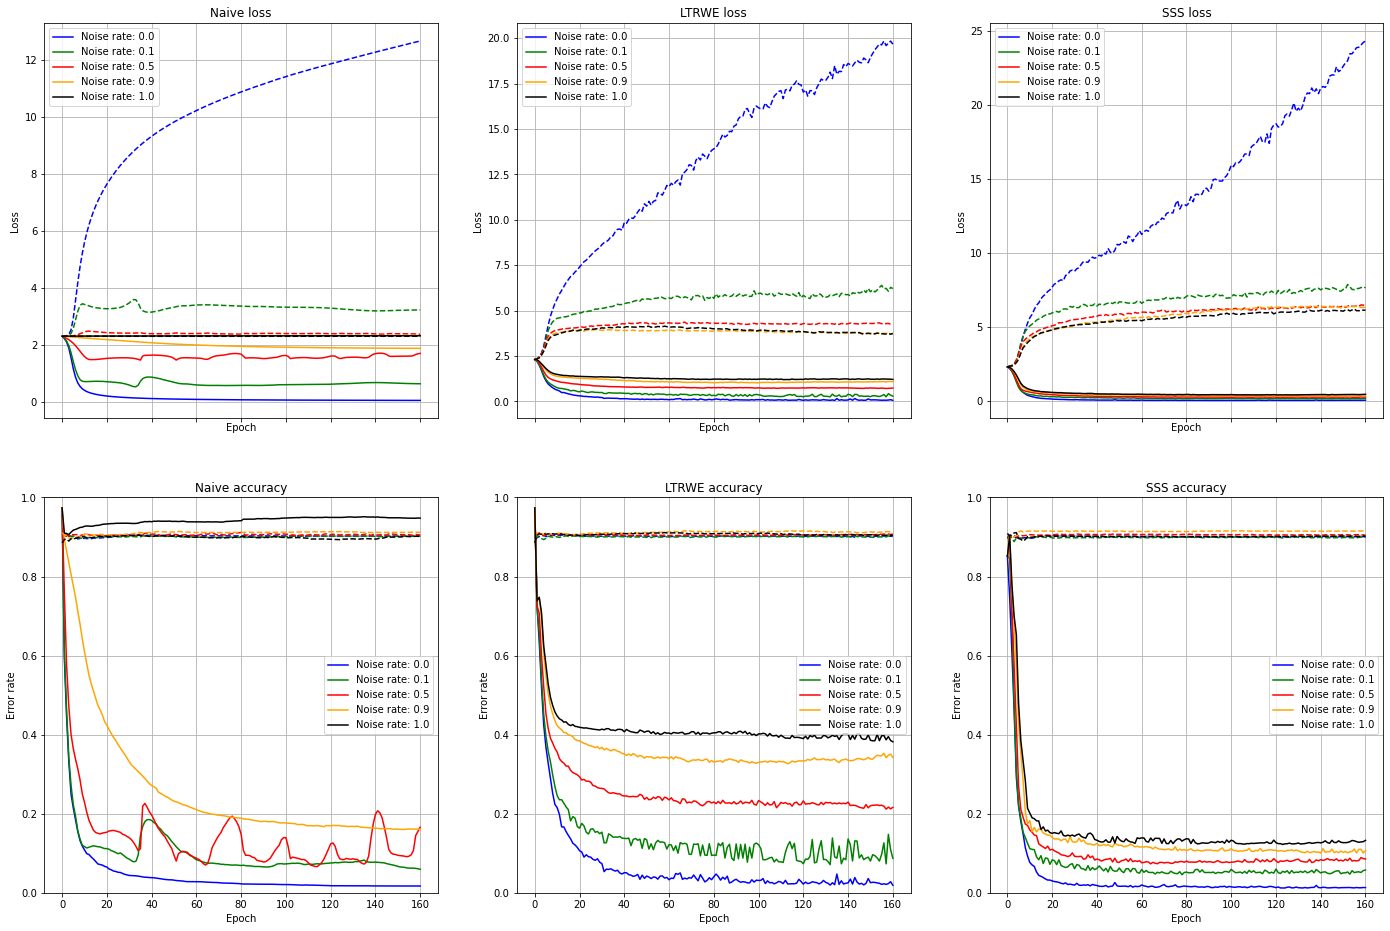

In [2]:
def plot_performance_over_time(dicts, error_rates, colors, col):
    for (results_dict, e, c) in zip(dicts, error_rates, colors):
        x, y = results_dict['test_correct_loss']
        ax[0][col].plot(x, y, '-', color=c, label='Noise rate: {}'.format(e))
        x, y = results_dict['test_incorrect_loss']
        ax[0][col].plot(x, y, '--', color=c)
        x, y = results_dict['test_correct_accuracy']
        ax[1][col].plot(x, 1-y, '-', color=c, label='Noise rate: {}'.format(e))
        x, y = results_dict['test_incorrect_accuracy']
        ax[1][col].plot(x, 1-y, '--', color=c)
        ax[0][col].legend()
        ax[1][col].legend()
        ax[0][col].set_xlabel('Epoch')
        ax[1][col].set_xlabel('Epoch')
        ax[0][col].set_ylabel('Loss')
        ax[1][col].set_ylabel('Error rate')
        ax[0][col].grid(True)
        ax[1][col].grid(True)
        ax[1][col].set_ylim(0, 1)

(fig, ax) = plt.subplots(2, 3, figsize=(3*8, 2*8), sharex=True)
ax[0][0].set_title('Naive loss')
ax[1][0].set_title('Naive accuracy')
ax[0][1].set_title('LTRWE loss')
ax[1][1].set_title('LTRWE accuracy')
ax[0][2].set_title('SSS loss')
ax[1][2].set_title('SSS accuracy')
error_rates = [0.0, .1, .5, .9, 1.0]
colors = ['blue', 'green', 'red', 'orange', 'black']
plot_performance_over_time(naive_results, error_rates, colors, 0)
plot_performance_over_time(ltrwe_results, error_rates, colors, 1)
plot_performance_over_time(sss_results, error_rates, colors, 2)

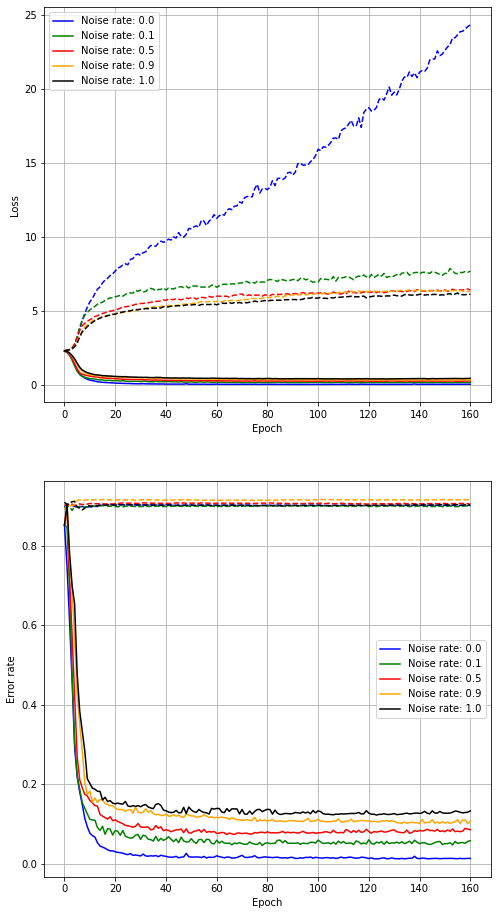

In [3]:
def plot_performance_alone(dicts, error_rates, colors):
    (fig, ax) = plt.subplots(2, 1, figsize=(8, 16))
    for (results_dict, e, c) in zip(dicts, error_rates, colors):
        x, y = results_dict['test_correct_loss']
        ax[0].plot(x, y, '-', color=c, label='Noise rate: {}'.format(e))
        x, y = results_dict['test_incorrect_loss']
        ax[0].plot(x, y, '--', color=c)
        x, y = results_dict['test_correct_accuracy']
        ax[1].plot(x, 1-y, '-', color=c, label='Noise rate: {}'.format(e))
        x, y = results_dict['test_incorrect_accuracy']
        ax[1].plot(x, 1-y, '--', color=c)
        ax[0].legend()
        ax[1].legend()
        ax[0].set_xlabel('Epoch')
        ax[1].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')
        ax[1].set_ylabel('Error rate')
        ax[0].grid(True)
        ax[1].grid(True)
plot_performance_alone(sss_results, error_rates, colors)

Text(0.5, 1.0, 'SSS')

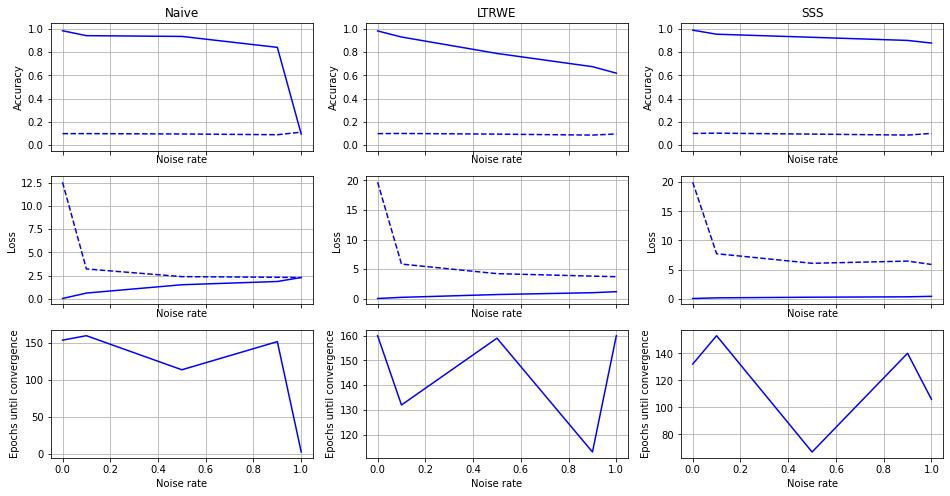

In [4]:
(fig, ax) = plt.subplots(3, 3, figsize=(16, 8), sharex=True)
def plot_final_performance(dicts, probs, col):
    epochs = []
    majority_accuracy = []
    minority_accuracy = []
    majority_loss = []
    minority_loss = []
    for d in dicts:
        x, y_min = d['test_incorrect_accuracy']
        _, y_maj = d['test_correct_accuracy']
        idx = np.argmax(y_min+y_maj)
        epochs.append(x[idx])
        majority_accuracy.append(d['test_correct_accuracy'][1][idx])
        minority_accuracy.append(d['test_incorrect_accuracy'][1][idx])
        majority_loss.append(d['test_correct_loss'][1][idx])
        minority_loss.append(d['test_incorrect_loss'][1][idx])
    ax[0][col].plot(error_rates, majority_accuracy, linestyle='-', color='blue')
    ax[0][col].plot(error_rates, minority_accuracy, linestyle='--', color='blue')
    ax[1][col].plot(error_rates, majority_loss, linestyle='-', color='blue')
    ax[1][col].plot(error_rates, minority_loss, linestyle='--', color='blue')
    ax[2][col].plot(error_rates, epochs, linestyle='-', color='blue')
    ax[0][col].set_xlabel('Noise rate')
    ax[1][col].set_xlabel('Noise rate')
    ax[2][col].set_xlabel('Noise rate')
    ax[0][col].set_ylabel('Accuracy')
    ax[1][col].set_ylabel('Loss')
    ax[2][col].set_ylabel('Epochs until convergence')
    ax[0][col].grid(True)
    ax[1][col].grid(True)
    ax[2][col].grid(True)
    #ax[0][col].set_xscale('log')
    #ax[1][col].set_xscale('log')
    #ax[2][col].set_xscale('log')
    ax[0][col].set_ylim(-.05, 1.05)
    #ax[1][col].set_ylim(-.05, 1.05)
    #ax[2][col].set_ylim(0, 1000)
plot_final_performance(naive_results, error_rates, 0)
plot_final_performance(ltrwe_results, error_rates, 1)
plot_final_performance(sss_results, error_rates, 2)
ax[0][0].set_title('Naive')
ax[0][1].set_title('LTRWE')
ax[0][2].set_title('SSS')

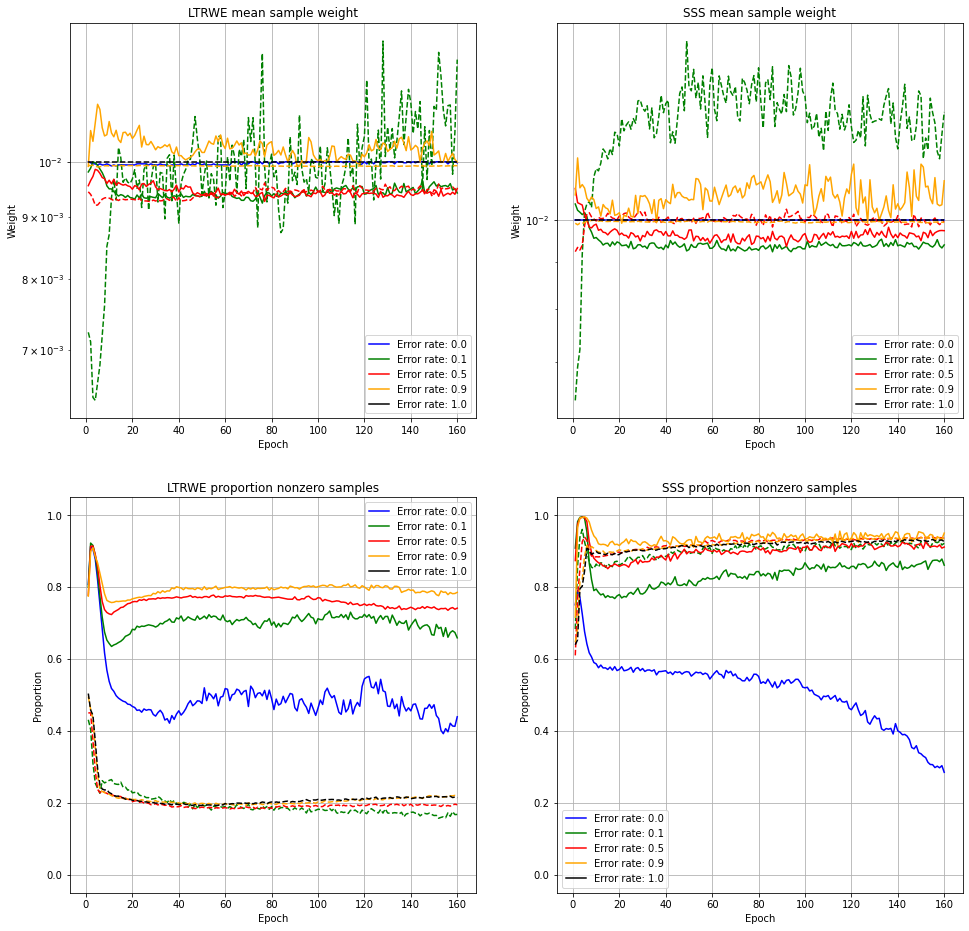

In [5]:
(fig, ax) = plt.subplots(2, 2, figsize=(16, 16))
ax[0][0].set_title('LTRWE mean sample weight')
ax[0][1].set_title('SSS mean sample weight')
ax[1][0].set_title('LTRWE proportion nonzero samples')
ax[1][1].set_title('SSS proportion nonzero samples')

def plot_weight_over_time(dicts, error_rates, colors, col):
    for (results_dict, e, c) in zip(dicts, error_rates, colors):
        x, y = results_dict['train_correct_weights_mean']
        ax[0][col].plot(x, y, '-', color=c, label='Error rate: {}'.format(e))
        x, y = results_dict['train_incorrect_weights_mean']
        ax[0][col].plot(x, y, '--', color=c)
        ax[0][col].legend()
        ax[0][col].set_yscale('log')
        ax[0][col].set_xlabel('Epoch')
        ax[0][col].set_ylabel('Weight')
        ax[0][col].grid(True)

def plot_count_over_time(dicts, error_rates, colors, col):
    for (results_dict, e, c) in zip(dicts, error_rates, colors):
        x, y = results_dict['train_clean_nonzero_samples']
        y = y.astype(float)
        if e != 1:
            y /= 50000*(1-e)
        else:
            x = []
            y = []
        ax[1][col].plot(x, y, '-', color=c, label='Error rate: {}'.format(e))
        x, y = results_dict['train_noisy_nonzero_samples']
        y = y.astype(float)
        if e != 0:
            y /= 50000*e
        else:
            x = []
            y = []
        ax[1][col].plot(x, y, '--', color=c)
        ax[1][col].set_ylim(-.05, 1.05)
        ax[1][col].legend()
        ax[1][col].set_xlabel('Epoch')
        ax[1][col].set_ylabel('Proportion')
        ax[1][col].grid(True)

plot_weight_over_time(ltrwe_results, error_rates, colors, 0)
plot_count_over_time(ltrwe_results, error_rates, colors, 0)
plot_weight_over_time(sss_results, error_rates, colors, 1)
plot_count_over_time(sss_results, error_rates, colors, 1)

In [6]:
def print_time(dicts):
    times = []
    for d in dicts:
        times.append(d['time_taken'])
    print('Time: {} +/- {}'.format(np.mean(times), np.std(times)))

print('Naive method:')
print_time(naive_results)
print('LTRWE:')
print_time(ltrwe_results)
print('SSS:')
print_time(sss_results)

Naive method:
Time: 944.6698399543762 +/- 1.1580766828883062
LTRWE:
Time: 2583.1671764373777 +/- 3.7100986752677696
SSS:
Time: 2562.876710510254 +/- 3.779712886411247
